In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.extend(['../../scripts','../../scripts/xenium'])
import readwrite
cfg = readwrite.config()

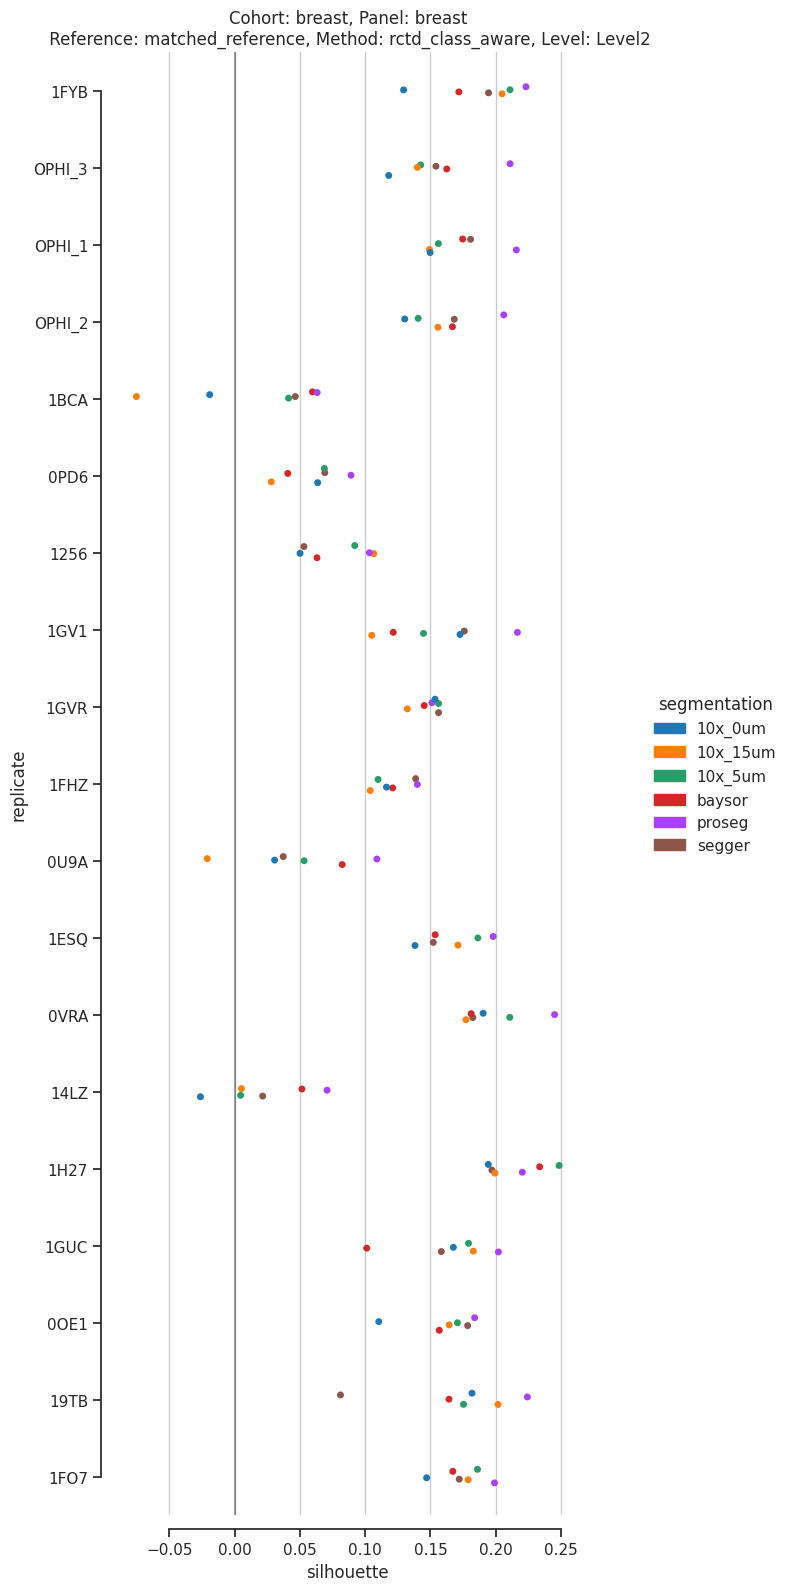

In [147]:
import argparse
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path

# Set up argument parser
# parser = argparse.ArgumentParser(description="Plot panel of Xenium donors.")
# parser.add_argument("--panel", type=Path, help="Path to the panel file.")
# parser.add_argument("--out_file", type=str, help="Path to the output file.")
# args = parser.parse_args()

# Access the arguments
# panel = args.panel
# out_file = args.out_file


plot_condition = 'breast'
plot_panel = 'breast'
reference = 'matched_reference'
method = 'rctd_class_aware'
level = 'Level2'

results_dir = Path(cfg['results_dir']) / 'silhouette/'

# vars
xenium_levels = ["segmentation", "condition", "panel", "donor", "sample", "index"]

# read cell type annotation
annot = {}
for segmentation in (segmentations := results_dir.iterdir()):
    for condition in (conditions := segmentation.iterdir()):
        if condition.stem != plot_condition:
            continue
        for panel in (panels := condition.iterdir()):
            if panel.stem != plot_panel:
                continue
            for donor in (donors := panel.iterdir()):
                for sample in (samples := donor.iterdir()):
                    k = (
                        segmentation.stem,
                        condition.stem,
                        panel.stem,
                        donor.stem,
                        sample.stem,
                    )

                    annot[k] = {}
                    annot_file = sample/ "silhouette.parquet"
                    if annot_file.exists():
                        annot[k] = pd.read_parquet(annot_file)

# merge annotations
df_annot = pd.concat(annot)
df_annot = df_annot.reset_index()
df_annot.columns = xenium_levels + df_annot.columns[len(xenium_levels):].tolist()

df = df_annot.query(f"condition == '{plot_condition}' and panel == '{plot_panel}' and reference == '{reference}' and method == '{method}' and level == '{level}'")

# plotting params, palette
title = f"condition: {plot_condition}, Panel: {plot_panel}\n Reference: {reference}, Method: {method}, Level: {level}"
hue = 'segmentation'
unique_labels = np.unique(df[hue].dropna())
palette = dict(zip(unique_labels, sc.pl.palettes.default_20))
legend_handles = [
    mpatches.Patch(color=color, label=label) for label, color in palette.items()
]


# Create joint boxplot
sns.set(style="ticks")
f = plt.figure(figsize=(6, df['sample'].nunique()))
g = sns.stripplot(data=df, x="silhouette", y="sample", hue=hue,legend=False,palette=palette)#, cut=0, width=1,inner='quart')

sns.despine(offset=10, trim=True)
plt.gca().xaxis.grid(True) 
plt.axvline(0,c='k',linestyle='-',alpha=.4)

plt.title(title)
f.legend(
    handles=legend_handles,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title=hue,
    frameon=False,
)
# plt.tight_layout(rect=[0, 0, 0.85, 0.95])
# plt.savefig(out_file, dpi=300, bbox_inches="tight")
# plt.close()


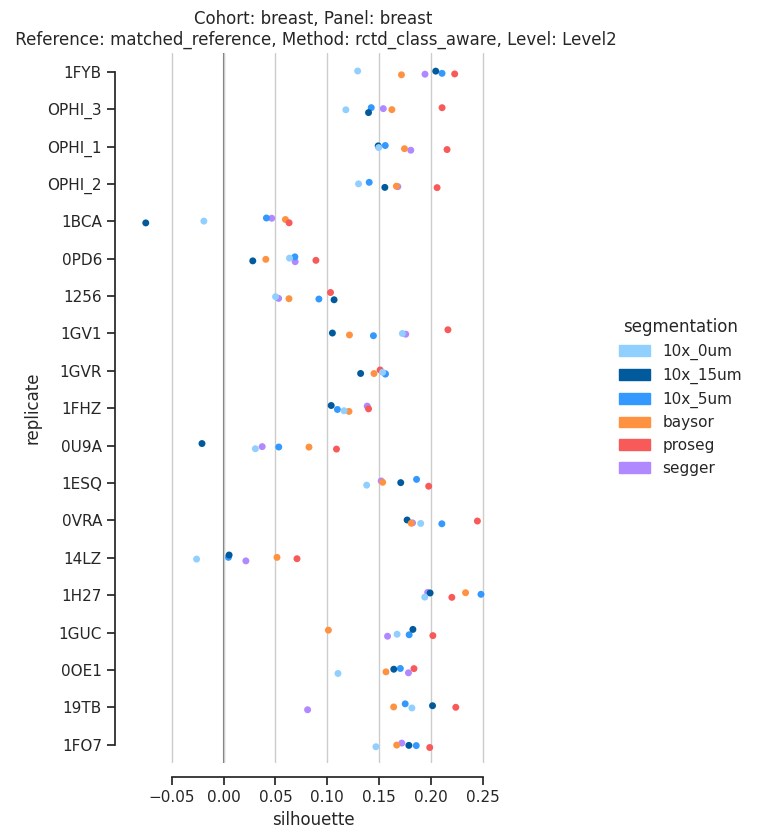

In [178]:
import argparse
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path

# Access the arguments
panel = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/results/silhouette/proseg/breast/breast/')
silhouette_dir = panel.parents[2]
segmentation_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_segmentation.csv')
reference = 'matched_reference'
method = 'rctd_class_aware'
level = 'Level2'

plot_panel = panel.stem
plot_condition = panel.parents[0].stem

palette = pd.read_csv(segmentation_palette,index_col=0)['cols_segmentation']

# vars
xenium_levels = ["segmentation", "condition", "panel", "donor", "sample", "index"]

# read cell type annotation
annot = {}
for segmentation in (segmentations := silhouette_dir.iterdir()):
    for condition in (conditions := segmentation.iterdir()):
        if condition.stem != plot_condition:
            continue
        for panel in (panels := condition.iterdir()):
            if panel.stem != plot_panel:
                continue
            for donor in (donors := panel.iterdir()):
                for sample in (samples := donor.iterdir()):
                    k = (
                        segmentation.stem,
                        condition.stem,
                        panel.stem,
                        donor.stem,
                        sample.stem,
                    )

                    annot[k] = {}
                    annot_file = sample / "silhouette.parquet"
                    if annot_file.exists():
                        annot[k] = pd.read_parquet(annot_file)

# merge annotations
df_annot = pd.concat(annot)
df_annot = df_annot.reset_index()
df_annot.columns = xenium_levels + df_annot.columns[len(xenium_levels) :].tolist()

df = df_annot.query(
    f"condition == '{plot_condition}' and panel == '{plot_panel}' and reference == '{reference}' and method == '{method}' and level == '{level}'"
)

# plotting params, palette
title = f"condition: {plot_condition}, Panel: {plot_panel}\n Reference: {reference}, Method: {method}, Level: {level}"
hue = "segmentation"
unique_labels = np.unique(df[hue].dropna())
palette = {u: palette[u] for u in unique_labels} 
legend_handles = [
    mpatches.Patch(color=color, label=label) for label, color in palette.items()
]


# Create joint boxplot
sns.set(style="ticks")
f = plt.figure(figsize=(6, df["sample"].nunique()//2))
g = sns.stripplot(
    data=df, x="silhouette", y="sample", hue=hue, legend=False, palette=palette
)  # , cut=0, width=1,inner='quart')

sns.despine(offset=10, trim=True)
plt.gca().xaxis.grid(True)
plt.axvline(0, c="k", linestyle="-", zorder=0, alpha=0.6)

plt.title(title)
f.legend(
    handles=legend_handles,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title=hue,
    frameon=False,
)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])